In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from math import sqrt
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
%matplotlib inline

In [51]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)
data = pd.read_csv("data_set.csv", low_memory = False)

In [52]:
train_df = train_df[['id','precio']]
train_df['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [69]:
data = data[['id'
,'usosmultiples.1'
,'desc_alquila'
,'titulo_alquila'
,'desc_vende'
,'titulo_vende'
,'desc_positiva'
,'titulo_positiva'
,'desc_ambientes'
,'titulo_ambientes'
,'desc_seguridad'
,'titulo_seguridad'
,'desc_zona'
,'titulo_zona'
,'desc_avenida'
,'titulo_avenida'
,'popular_titulo_2'
,'desc_antiguedad'
,'titulo_antiguedad'
,'desc_comedor'
,'titulo_comedor'
,'desc_estudio'
,'titulo_estudio'
,'desc_auto'
,'titulo_auto'
,'desc_amenities_lujo'
,'titulo_amenities_lujo'
,'desc_gym'
,'titulo_gym'
,'desc_construcc'
,'titulo_construcc'
,'desc_terminado'
,'titulo_terminado'
,'desc_anhelo'
,'titulo_anhelo'
,'desc_pago'
,'titulo_pago'
,'desc_frente'
,'titulo_frente'
,'desc_escuela'
,'titulo_escuela'
,'desc_amoblado'
,'titulo_amoblado'
,'desc_tipo_casa'
,'titulo_tipo_casa'
,'desc_tipo_dpto'
,'titulo_tipo_dpto'
,'desc_oficina'
,'titulo_oficina'
,'desc_transport'
,'Desconocida'
,'titulo_transport'
,'desc_pileta'
,'titulo_pileta'
,'avenue_en_desc'
,'avenida'
,'idzona_0'
,'idzona_1'
,'idzona_2'
,'idzona_3'
,'idzona_4'
,'idzona_5'
,'idzona_6'
,'idzona_7'
,'idzona_8'
,'idzona_9'
,'idzona_10'
,'idzona_11'
,'idzona_12'
,'idzona_13'
,'idzona_14'
,'idzona_15'
,'metroscubiertos_fillmean'
,'metrostotales_fillmean'
,'metrostotales_cuadrado'
,'metroscubiertos_cuadrado'
,'metrostotales_fillmean_cuadrado'
,'metroscubiertos_fillmean_cuadrado'
,'mes'
,'dia'
,'not_outlier'
,'days_to_today_y'
,'año'
,'antiguedad_y'
,'centroscomercialescercanos'
,'escuelascercanas_y'
,'habitaciones_y'
,'garages_y'
,'banos_y'
,'anio_y'
,'Apartamento_y'
,'Bodega comercial_y'
,'Casa_y'
,'Casa en condominio_y'
,'Casa uso de suelo_y'
,'Departamento Compartido_y'
,'Duplex_y'
,'Edificio_y'
,'Garage_y'
,'Hospedaje_y'
,'Huerta_y'
,'Inmuebles productivos urbanos_y'
,'Local Comercial_y'
,'Local en centro comercial_y'
,'Lote_y'
,'Nave industrial_y'
,'Oficina comercial_y'
,'Otros_y'
,'Quinta Vacacional_y'
,'Rancho_y'
,'Terreno_y'
,'Terreno comercial_y'
,'Terreno industrial_y'
,'Villa_y'
,'gimnasio_y'
,'usosmultiples_y'
,'piscina_y'
,'qty_of_extras'
,'metroscubiertos_y'
,'metrostotales_y'
,'popular_desc_1'
,'popular_desc_2_y'
,'popular_desc_3'
,'popular_desc_4'
,'popular_desc_5'
,'popular_desc_6'
,'popular_desc_7'
,'popular_desc_8'
,'popular_desc_9'
,'popular_desc_10'
,'popular_desc_11'
,'popular_desc_12'
,'popular_desc_13'
,'idzona'
,'lat'
,'lng'
,'avenue_y'
,'Aguascalientes'
,'Baja California Norte'
,'Baja California Sur'
,'Campeche'
,'Chiapas'
,'Chihuahua'
,'Coahuila'
,'Colima'
,'Distrito Federal'
,'Durango'
,'Edo. de México'
,'Guanajuato'
,'Guerrero'
,'Hidalgo'
,'Jalisco'
,'Michoacán'
,'Morelos'
,'Nayarit'
,'Nuevo León'
,'Oaxaca'
,'Puebla'
,'Querétaro'
,'Quintana Roo'
,'San luis Potosí'
,'Sinaloa'
,'Sonora'
,'Tabasco'
,'Tamaulipas'
,'Tlaxcala'
,'Veracruz'
,'Yucatán'
,'Zacatecas'
,'precio_ciudad'
,'precio_provincia'
,'precio_idzona']]

In [70]:
test_df.shape

(60000, 22)

In [71]:
train_df.shape

(240000, 2)

In [72]:
features = pd.merge(train_df, data, on='id', how='inner')
features = features.fillna(0)
features['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [73]:
labels = features['precio']
features = features.drop(['id','precio'], axis=1)


In [74]:
set_test = pd.merge(data, test_df[['id']],on = "id", how = "inner")
ids = set_test["id"]
set_test = set_test.drop(columns=['id'])

In [75]:
set_test = set_test.fillna(0)

In [76]:
set_test.head()

,usosmultiples.1,desc_alquila,titulo_alquila,desc_vende,titulo_vende,desc_positiva,titulo_positiva,desc_ambientes,titulo_ambientes,desc_seguridad,...,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas,precio_ciudad,precio_provincia,precio_idzona
0,0.0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,4.496526e+06,3.471705e+06,0.000000e+00
1,0.0,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,1,0,2.028803e+06,2.036020e+06,2.684120e+06
2,0.0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3.407009e+06,3.471705e+06,2.726905e+06
3,0.0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,2.585813e+06,2.548742e+06,1.465647e+06
4,0.0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,9.147382e+05,2.762465e+06,9.399999e+05


In [77]:
regressor = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.02,
                             gamma=0, subsample=0.5, colsample_bytree=0.5, max_depth=10, min_child_weight=1)

regressor.fit(features, labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [78]:
preds_kaggel_knn = regressor.predict(set_test)

In [79]:
df_kaggel_knn = pd.DataFrame(preds_kaggel_knn)
df_kaggel_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
0    60000 non-null float32
dtypes: float32(1)
memory usage: 234.5 KB


In [80]:
df_kaggel_knn = pd.DataFrame(df_kaggel_knn)

In [81]:
df_kaggel_knn.head()

,0
0,8.407520e+06
1,8.489314e+05
2,2.947959e+06
3,8.417749e+05
4,4.708846e+05


In [82]:
# df_kaggel_knn = df_kaggel_knn.to_frame()# df_kagg 
df_kaggel_knn["id"] = ids
df_kaggel_knn.rename(columns = {0: 'target'},inplace = True) 
df_kaggel_knn = df_kaggel_knn[['id','target']]

In [83]:
df_kaggel_knn.head()

,id,target
0,4941,8.407520e+06
1,51775,8.489314e+05
2,115253,2.947959e+06
3,299321,8.417749e+05
4,173570,4.708846e+05


In [84]:
df_kaggel_knn.to_csv('ResultadosXGB-final.csv',index=False)

In [85]:
df_kaggel_knn.shape

(60000, 2)

In [86]:
df_kaggel_knn.head()

,id,target
0,4941,8.407520e+06
1,51775,8.489314e+05
2,115253,2.947959e+06
3,299321,8.417749e+05
4,173570,4.708846e+05


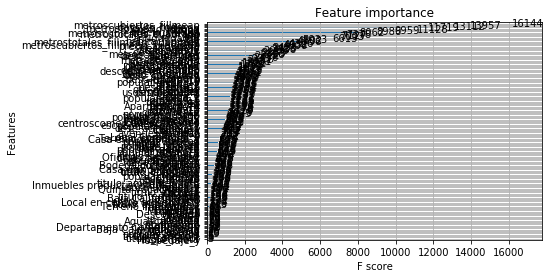

In [87]:
import matplotlib.pyplot as plt
xgb.plot_importance(regressor)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()